In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm

In [38]:
age = np.array([3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17])
wing = np.array([1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0])

1. Plot the relationship between Age and Wing Length.
2. Calculate and plot the regression line.
3. Can you reject the null hyp?
4. Calculate and plot the confidence intervals on the slope of the regression.
5. Calculate r^2
 (the coefficient of determination)
6. Calculate Pearson's r.
7. Add some noise to the data and see how the regression changes.

## 1

Text(0, 0.5, 'Wing Length')

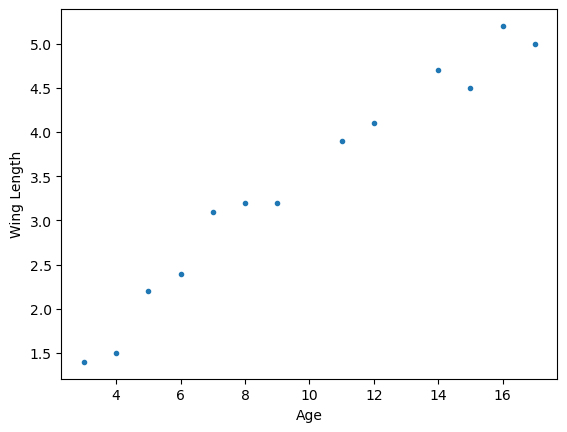

In [14]:
plt.plot(age,wing, marker = ".", linestyle = "none")
plt.xlabel("Age")
plt.ylabel("Wing Length")

## 2

In [48]:
X = age.reshape(-1, 1)
X = sm.add_constant(X)  # Adds a constant term (intercept) to the model
model = sm.OLS(wing,X)  # OLS stands for Ordinary Least Squares
results = model.fit()  # Fit the model

In [50]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     289.4
Date:                Sun, 29 Sep 2024   Prob (F-statistic):           3.01e-09
Time:                        12:06:56   Log-Likelihood:                0.36312
No. Observations:                  13   AIC:                             3.274
Df Residuals:                      11   BIC:                             4.404
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8296      0.168      4.946      0.0

/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  k, _ = kurtosistest(a, axis)


## 3

Yes, can reject the null hypothesis because P of the slope (indicated in x1) is <0.05


## 4

In [54]:
conf_intervals = results.conf_int()
conf_intervals

array([[0.46042944, 1.19881928],
       [0.23043928, 0.29892896]])

In [56]:
slope_conf_interval = conf_intervals[1]

Slope confidence interval: [0.23043928 0.29892896]


Text(0.5, 1.0, 'Regression Line with Confidence Interval on Slope')

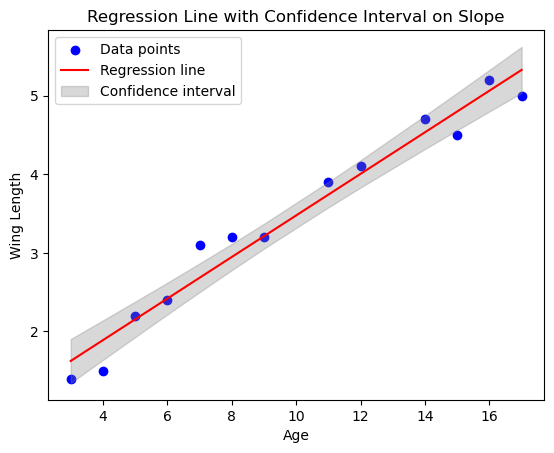

In [65]:
#from CHATGPT


# Get the regression parameters (slope and intercept)
slope = results.params[1]
intercept = results.params[0]

# Get the confidence intervals for the slope and intercept
conf_intervals = results.conf_int()

# Extract the confidence intervals for the slope
slope_conf_interval = conf_intervals[1]
print(f"Slope confidence interval: {slope_conf_interval}")

# Plotting the data points
plt.scatter(age, wing, label="Data points", color="blue")

# Plotting the regression line
plt.plot(age, intercept + slope * age, color="red", label="Regression line")

# Calculate confidence intervals for the regression line
predictions = results.get_prediction(X)
pred_summary = predictions.summary_frame(alpha=0.05)

# Plot the confidence interval bands
plt.fill_between(age, pred_summary['mean_ci_lower'], pred_summary['mean_ci_upper'], color='gray', alpha=0.3, label="Confidence interval")

plt.xlabel('Age')
plt.ylabel('Wing Length')
plt.legend()
plt.title('Regression Line with Confidence Interval on Slope')


In [64]:
pred_summary

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,1.623677,0.126989,1.344176,1.903177,0.995097,2.252257
1,1.888361,0.114415,1.636535,2.140187,1.271588,2.505134
2,2.153045,0.102663,1.927085,2.379005,1.546374,2.759716
3,2.417729,0.092048,2.215134,2.620324,1.819367,3.016091
4,2.682413,0.083006,2.499719,2.865107,2.090493,3.274333
5,2.947097,0.076100,2.779602,3.114593,2.359690,3.534504
6,3.211781,0.071950,3.053421,3.370142,2.626914,3.796649
7,3.741150,0.073486,3.579408,3.902892,3.155357,4.326942
8,4.005834,0.078982,3.831995,4.179672,3.416587,4.595081
9,4.535202,0.096781,4.322188,4.748216,3.933233,5.137171


## 5

In [80]:
print(f"Coefficient of Determination (R²): {results.rsquared:.4f}")


Coefficient of Determination (R²): 0.9634


## 6

In [85]:
r = np.corrcoef(x = age, y = wing)[0,1]

print(f"Pearson's r = {r:.4f}")

Pearson's r = 0.9815


In [86]:
#just checking that it is the same as taking the square root of the r^2 value
np.sqrt(results.rsquared)

0.981520377681628

## 7 

Text(0, 0.5, 'Wing Length')

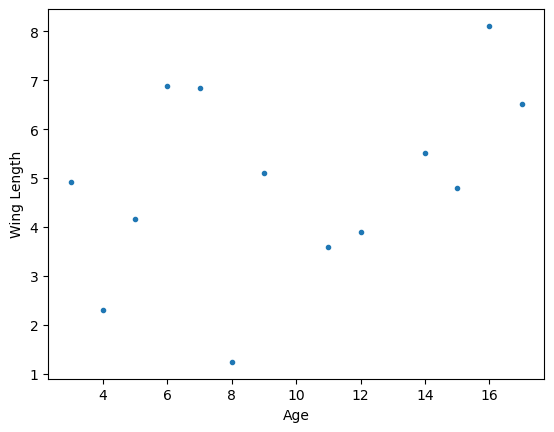

In [97]:
#ChatGPT used 

# Set the random seed for reproducibility
np.random.seed(0)

# Choose a noise level (e.g., standard deviation of the noise)
noise_level = 2  # Adjust this value to control the amount of noise

# Generate random noise
noise = np.random.normal(0, noise_level, wing.shape)

# Add noise to the original data
wing_noisy = wing + noise

plt.plot(age,wing_noisy, marker = ".", linestyle = "none")
plt.xlabel("Age")
plt.ylabel("Wing Length")

In [99]:
X = age.reshape(-1, 1)
X = sm.add_constant(X)  # Adds a constant term (intercept) to the model
model = sm.OLS(wing_noisy,X)  # OLS stands for Ordinary Least Squares
results = model.fit()  # Fit the model

X = age.reshape(-1, 1)
X = sm.add_constant(X)  # Adds a constant term (intercept) to the model
model = sm.OLS(wing_noisy,X)  # OLS stands for Ordinary Least Squares
results = model.fit()  # Fit the model

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     1.868
Date:                Sun, 29 Sep 2024   Prob (F-statistic):              0.199
Time:                        12:44:49   Log-Likelihood:                -25.412
No. Observations:                  13   AIC:                             54.82
Df Residuals:                      11   BIC:                             55.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4050      1.218      2.795      0.0

/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  k, _ = kurtosistest(a, axis)


Slope confidence interval: [-0.0942535   0.40314026]


Text(0.5, 1.0, 'Regression Line with Confidence Interval on Slope')

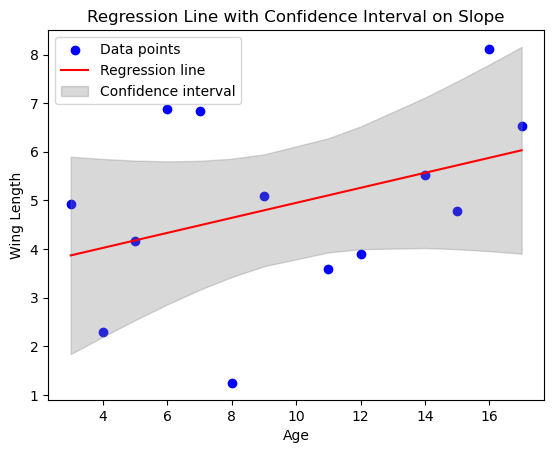

In [100]:
#from CHATGPT


# Get the regression parameters (slope and intercept)
slope = results.params[1]
intercept = results.params[0]

# Get the confidence intervals for the slope and intercept
conf_intervals = results.conf_int()

# Extract the confidence intervals for the slope
slope_conf_interval = conf_intervals[1]
print(f"Slope confidence interval: {slope_conf_interval}")

# Plotting the data points
plt.scatter(age, wing_noisy, label="Data points", color="blue")

# Plotting the regression line
plt.plot(age, intercept + slope * age, color="red", label="Regression line")

# Calculate confidence intervals for the regression line
predictions = results.get_prediction(X)
pred_summary = predictions.summary_frame(alpha=0.05)

# Plot the confidence interval bands
plt.fill_between(age, pred_summary['mean_ci_lower'], pred_summary['mean_ci_upper'], color='gray', alpha=0.3, label="Confidence interval")

plt.xlabel('Age')
plt.ylabel('Wing Length')
plt.legend()
plt.title('Regression Line with Confidence Interval on Slope')


In [103]:
print(f"Coefficient of Determination (R²): {results.rsquared:.4f}")
r = np.corrcoef(x = age, y = wing_noisy)[0,1]

print(f"Pearson's r = {r:.4f}")

Coefficient of Determination (R²): 0.1452
Pearson's r = 0.3810
